In [22]:
#import libraries
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.callbacks import ModelCheckpoint

# for accuracy and loss graph
import matplotlib.pyplot as plt

In [7]:
keras.__version__

'2.7.0'

In [8]:
train_data_path = "./Cotton_Disease/train/"
validation_data_path = "./Cotton_Disease/val/"

In [10]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [11]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 1951 images belonging to 4 classes.


In [12]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [13]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 253 images belonging to 4 classes.


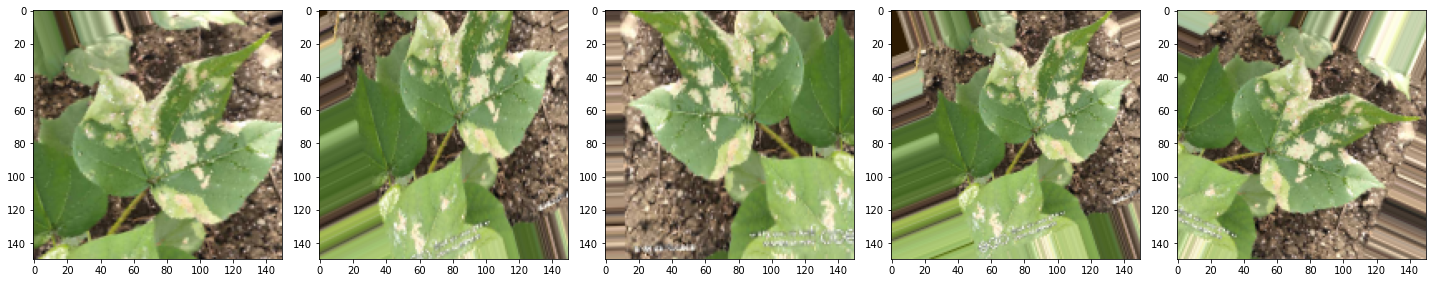

In [14]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [26]:
# save best model using vall accuracy
model_path = './v4_pred_cott_dis.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [27]:

#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])


# compile cnn model
cnn_model.compile(optimizer = keras.optimizers.Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [28]:
cnn_model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 17, 17, 128)     

In [30]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=500, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 16.06

Epoch 1/500
61/61 [==============================] - ETA: 0s - loss: 0.6420 - accuracy: 0.7514
Epoch 00001: val_accuracy did not improve from 0.70751
61/61 [==============================] - 79s 1s/step - loss: 0.6420 - accuracy: 0.7514 - val_loss: 0.7940 - val_accuracy: 0.6522
Epoch 2/500
61/61 [==============================] - ETA: 0s - loss: 0.6687 - accuracy: 0.7458
Epoch 00002: val_accuracy did not improve from 0.70751
61/61 [==============================] - 90s 1s/step - loss: 0.6687 - accuracy: 0.7458 - val_loss: 0.8135 - val_accuracy: 0.6759
Epoch 3/500
61/61 [==============================] - ETA: 0s - loss: 0.6149 - accuracy: 0.7606
Epoch 00003: val_accuracy improved from 0.70751 to 0.74308, saving model to .\v4_pred_cott_dis.h5
61/61 [==============================] - 85s 1s/step - loss: 0.6149 - accuracy: 0.7606 - val_loss: 0.5564 - val_accuracy: 0.7431
Epoch 4/500
61/61 [==============================] - ETA: 0s - loss: 0.5580 - accuracy: 0.7847
Epoch 00004: val_accuracy

Epoch 30/500
61/61 [==============================] - ETA: 0s - loss: 0.3425 - accuracy: 0.8693
Epoch 00030: val_accuracy did not improve from 0.93281
61/61 [==============================] - 81s 1s/step - loss: 0.3425 - accuracy: 0.8693 - val_loss: 0.4976 - val_accuracy: 0.7945
Epoch 31/500
61/61 [==============================] - ETA: 0s - loss: 0.3439 - accuracy: 0.8760
Epoch 00031: val_accuracy did not improve from 0.93281
61/61 [==============================] - 79s 1s/step - loss: 0.3439 - accuracy: 0.8760 - val_loss: 0.2687 - val_accuracy: 0.8893
Epoch 32/500
61/61 [==============================] - ETA: 0s - loss: 0.3291 - accuracy: 0.8729
Epoch 00032: val_accuracy did not improve from 0.93281
61/61 [==============================] - 80s 1s/step - loss: 0.3291 - accuracy: 0.8729 - val_loss: 0.2094 - val_accuracy: 0.9170
Epoch 33/500
61/61 [==============================] - ETA: 0s - loss: 0.3416 - accuracy: 0.8703
Epoch 00033: val_accuracy did not improve from 0.93281
61/61 [==

Epoch 59/500
61/61 [==============================] - ETA: 0s - loss: 0.2625 - accuracy: 0.9021
Epoch 00059: val_accuracy did not improve from 0.96047
61/61 [==============================] - 79s 1s/step - loss: 0.2625 - accuracy: 0.9021 - val_loss: 0.1921 - val_accuracy: 0.9368
Epoch 60/500
61/61 [==============================] - ETA: 0s - loss: 0.2439 - accuracy: 0.9072
Epoch 00060: val_accuracy did not improve from 0.96047
61/61 [==============================] - 79s 1s/step - loss: 0.2439 - accuracy: 0.9072 - val_loss: 0.2229 - val_accuracy: 0.9051
Epoch 61/500
61/61 [==============================] - ETA: 0s - loss: 0.2774 - accuracy: 0.8908
Epoch 00061: val_accuracy did not improve from 0.96047
61/61 [==============================] - 83s 1s/step - loss: 0.2774 - accuracy: 0.8908 - val_loss: 0.1705 - val_accuracy: 0.9447
Epoch 62/500
61/61 [==============================] - ETA: 0s - loss: 0.2576 - accuracy: 0.9031
Epoch 00062: val_accuracy did not improve from 0.96047
61/61 [==

Epoch 88/500
61/61 [==============================] - ETA: 0s - loss: 0.2433 - accuracy: 0.9129
Epoch 00088: val_accuracy did not improve from 0.98419
61/61 [==============================] - 80s 1s/step - loss: 0.2433 - accuracy: 0.9129 - val_loss: 0.1054 - val_accuracy: 0.9644
Epoch 89/500
61/61 [==============================] - ETA: 0s - loss: 0.2219 - accuracy: 0.9170
Epoch 00089: val_accuracy did not improve from 0.98419
61/61 [==============================] - 79s 1s/step - loss: 0.2219 - accuracy: 0.9170 - val_loss: 0.1966 - val_accuracy: 0.9209
Epoch 90/500
61/61 [==============================] - ETA: 0s - loss: 0.2146 - accuracy: 0.9211
Epoch 00090: val_accuracy did not improve from 0.98419
61/61 [==============================] - 79s 1s/step - loss: 0.2146 - accuracy: 0.9211 - val_loss: 0.2006 - val_accuracy: 0.9289
Epoch 91/500
61/61 [==============================] - ETA: 0s - loss: 0.2108 - accuracy: 0.9216
Epoch 00091: val_accuracy did not improve from 0.98419
61/61 [==

61/61 [==============================] - ETA: 0s - loss: 0.1429 - accuracy: 0.9477
Epoch 00146: val_accuracy did not improve from 0.98419
61/61 [==============================] - 103s 2s/step - loss: 0.1429 - accuracy: 0.9477 - val_loss: 0.0818 - val_accuracy: 0.9802
Epoch 147/500
61/61 [==============================] - ETA: 0s - loss: 0.1687 - accuracy: 0.9421
Epoch 00147: val_accuracy did not improve from 0.98419
61/61 [==============================] - 99s 2s/step - loss: 0.1687 - accuracy: 0.9421 - val_loss: 0.1531 - val_accuracy: 0.9486
Epoch 148/500
61/61 [==============================] - ETA: 0s - loss: 0.1582 - accuracy: 0.9493
Epoch 00148: val_accuracy did not improve from 0.98419
61/61 [==============================] - 108s 2s/step - loss: 0.1582 - accuracy: 0.9493 - val_loss: 0.0770 - val_accuracy: 0.9723
Epoch 149/500
61/61 [==============================] - ETA: 0s - loss: 0.1357 - accuracy: 0.9523
Epoch 00149: val_accuracy did not improve from 0.98419
61/61 [==========

61/61 [==============================] - ETA: 0s - loss: 0.1341 - accuracy: 0.9472
Epoch 00204: val_accuracy did not improve from 0.98419
61/61 [==============================] - 99s 2s/step - loss: 0.1341 - accuracy: 0.9472 - val_loss: 0.0908 - val_accuracy: 0.9684
Epoch 205/500
61/61 [==============================] - ETA: 0s - loss: 0.1264 - accuracy: 0.9559
Epoch 00205: val_accuracy did not improve from 0.98419
61/61 [==============================] - 99s 2s/step - loss: 0.1264 - accuracy: 0.9559 - val_loss: 0.1094 - val_accuracy: 0.9407
Epoch 206/500
61/61 [==============================] - ETA: 0s - loss: 0.1295 - accuracy: 0.9585
Epoch 00206: val_accuracy did not improve from 0.98419
61/61 [==============================] - 98s 2s/step - loss: 0.1295 - accuracy: 0.9585 - val_loss: 0.0926 - val_accuracy: 0.9644
Epoch 207/500
61/61 [==============================] - ETA: 0s - loss: 0.1027 - accuracy: 0.9657
Epoch 00207: val_accuracy did not improve from 0.98419
61/61 [============

61/61 [==============================] - ETA: 0s - loss: 0.1204 - accuracy: 0.9554
Epoch 00233: val_accuracy did not improve from 0.98814
61/61 [==============================] - 79s 1s/step - loss: 0.1204 - accuracy: 0.9554 - val_loss: 0.1050 - val_accuracy: 0.9526
Epoch 234/500
61/61 [==============================] - ETA: 0s - loss: 0.1074 - accuracy: 0.9657
Epoch 00234: val_accuracy did not improve from 0.98814
61/61 [==============================] - 83s 1s/step - loss: 0.1074 - accuracy: 0.9657 - val_loss: 0.1217 - val_accuracy: 0.9565
Epoch 235/500
61/61 [==============================] - ETA: 0s - loss: 0.1118 - accuracy: 0.9626
Epoch 00235: val_accuracy did not improve from 0.98814
61/61 [==============================] - 79s 1s/step - loss: 0.1118 - accuracy: 0.9626 - val_loss: 0.0712 - val_accuracy: 0.9684
Epoch 236/500
61/61 [==============================] - ETA: 0s - loss: 0.0918 - accuracy: 0.9667
Epoch 00236: val_accuracy did not improve from 0.98814
61/61 [============

61/61 [==============================] - ETA: 0s - loss: 0.0988 - accuracy: 0.9682
Epoch 00291: val_accuracy did not improve from 0.98814
61/61 [==============================] - 82s 1s/step - loss: 0.0988 - accuracy: 0.9682 - val_loss: 0.0665 - val_accuracy: 0.9723
Epoch 292/500
61/61 [==============================] - ETA: 0s - loss: 0.1010 - accuracy: 0.9646
Epoch 00292: val_accuracy did not improve from 0.98814
61/61 [==============================] - 82s 1s/step - loss: 0.1010 - accuracy: 0.9646 - val_loss: 0.0653 - val_accuracy: 0.9684
Epoch 293/500
61/61 [==============================] - ETA: 0s - loss: 0.0840 - accuracy: 0.9662
Epoch 00293: val_accuracy did not improve from 0.98814
61/61 [==============================] - 82s 1s/step - loss: 0.0840 - accuracy: 0.9662 - val_loss: 0.0411 - val_accuracy: 0.9802
Epoch 294/500
61/61 [==============================] - ETA: 0s - loss: 0.1155 - accuracy: 0.9610
Epoch 00294: val_accuracy did not improve from 0.98814
61/61 [============

61/61 [==============================] - ETA: 0s - loss: 0.0940 - accuracy: 0.9636
Epoch 00320: val_accuracy did not improve from 0.99209
61/61 [==============================] - 97s 2s/step - loss: 0.0940 - accuracy: 0.9636 - val_loss: 0.0996 - val_accuracy: 0.9565
Epoch 321/500
61/61 [==============================] - ETA: 0s - loss: 0.0900 - accuracy: 0.9646
Epoch 00321: val_accuracy did not improve from 0.99209
61/61 [==============================] - 94s 2s/step - loss: 0.0900 - accuracy: 0.9646 - val_loss: 0.1462 - val_accuracy: 0.9407
Epoch 322/500
61/61 [==============================] - ETA: 0s - loss: 0.0819 - accuracy: 0.9708
Epoch 00322: val_accuracy did not improve from 0.99209
61/61 [==============================] - 94s 2s/step - loss: 0.0819 - accuracy: 0.9708 - val_loss: 0.0852 - val_accuracy: 0.9605
Epoch 323/500
61/61 [==============================] - ETA: 0s - loss: 0.0834 - accuracy: 0.9682
Epoch 00323: val_accuracy did not improve from 0.99209
61/61 [============

61/61 [==============================] - ETA: 0s - loss: 0.0614 - accuracy: 0.9800
Epoch 00378: val_accuracy did not improve from 0.99605
61/61 [==============================] - 95s 2s/step - loss: 0.0614 - accuracy: 0.9800 - val_loss: 0.1430 - val_accuracy: 0.9526
Epoch 379/500
61/61 [==============================] - ETA: 0s - loss: 0.0646 - accuracy: 0.9810
Epoch 00379: val_accuracy did not improve from 0.99605
61/61 [==============================] - 102s 2s/step - loss: 0.0646 - accuracy: 0.9810 - val_loss: 0.0354 - val_accuracy: 0.9802
Epoch 380/500
61/61 [==============================] - ETA: 0s - loss: 0.0718 - accuracy: 0.9739
Epoch 00380: val_accuracy did not improve from 0.99605
61/61 [==============================] - 97s 2s/step - loss: 0.0718 - accuracy: 0.9739 - val_loss: 0.0822 - val_accuracy: 0.9684
Epoch 381/500
61/61 [==============================] - ETA: 0s - loss: 0.0911 - accuracy: 0.9687
Epoch 00381: val_accuracy did not improve from 0.99605
61/61 [===========

61/61 [==============================] - ETA: 0s - loss: 0.0525 - accuracy: 0.9815
Epoch 00436: val_accuracy did not improve from 0.99605
61/61 [==============================] - 80s 1s/step - loss: 0.0525 - accuracy: 0.9815 - val_loss: 0.0538 - val_accuracy: 0.9763
Epoch 437/500
61/61 [==============================] - ETA: 0s - loss: 0.0487 - accuracy: 0.9836
Epoch 00437: val_accuracy did not improve from 0.99605
61/61 [==============================] - 84s 1s/step - loss: 0.0487 - accuracy: 0.9836 - val_loss: 0.0810 - val_accuracy: 0.9644
Epoch 438/500
61/61 [==============================] - ETA: 0s - loss: 0.0508 - accuracy: 0.9790
Epoch 00438: val_accuracy did not improve from 0.99605
61/61 [==============================] - 82s 1s/step - loss: 0.0508 - accuracy: 0.9790 - val_loss: 0.0852 - val_accuracy: 0.9684
Epoch 439/500
61/61 [==============================] - ETA: 0s - loss: 0.0808 - accuracy: 0.9744
Epoch 00439: val_accuracy did not improve from 0.99605
61/61 [============

61/61 [==============================] - ETA: 0s - loss: 0.0435 - accuracy: 0.9856
Epoch 00494: val_accuracy did not improve from 0.99605
61/61 [==============================] - 81s 1s/step - loss: 0.0435 - accuracy: 0.9856 - val_loss: 0.0687 - val_accuracy: 0.9763
Epoch 495/500
61/61 [==============================] - ETA: 0s - loss: 0.0436 - accuracy: 0.9826
Epoch 00495: val_accuracy did not improve from 0.99605
61/61 [==============================] - 83s 1s/step - loss: 0.0436 - accuracy: 0.9826 - val_loss: 0.0341 - val_accuracy: 0.9842
Epoch 496/500
61/61 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9851
Epoch 00496: val_accuracy did not improve from 0.99605
61/61 [==============================] - 79s 1s/step - loss: 0.0442 - accuracy: 0.9851 - val_loss: 0.0998 - val_accuracy: 0.9605
Epoch 497/500
61/61 [==============================] - ETA: 0s - loss: 0.0408 - accuracy: 0.9841
Epoch 00497: val_accuracy did not improve from 0.99605
61/61 [============

In [31]:
model_path2 = './Save_v4_1_pred_cott_dis.h5'
cnn_model.save(model_path2)

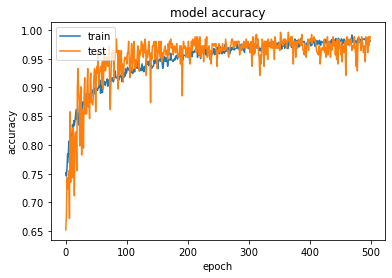

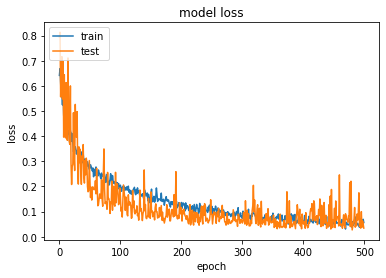

In [32]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [2]:
model=load_model('./Save_v4_1_pred_cott_dis.h5')

In [3]:
# img=image.load_img('./Cotton_Disease/test/diseased cotton leaf/3.png',target_size=(150,150))
# img=image.load_img('./Cotton_Disease/test/fresh cotton leaf/3.png',target_size=(150,150))
# img=image.load_img('./Cotton_Disease/test/diseased cotton plant/3.png',target_size=(150,150))
# img=image.load_img('./Cotton_Disease/test/fresh cotton plant/1.jpg',target_size=(150,150))
img=image.load_img('./Cotton_Disease/test/diseased cotton plant/1.jpg',target_size=(150,150))


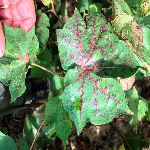

In [4]:
img

In [5]:
x=image.img_to_array(img)/255
x

array([[[0.85882354, 0.43137255, 0.52156866],
        [0.92941177, 0.44705883, 0.5176471 ],
        [0.96862745, 0.54509807, 0.6392157 ],
        ...,
        [0.7764706 , 0.78431374, 0.40392157],
        [0.7294118 , 0.7137255 , 0.3647059 ],
        [0.8784314 , 0.9254902 , 0.59607846]],

       [[0.85490197, 0.41960785, 0.49411765],
        [0.93333334, 0.45490196, 0.5137255 ],
        [0.95686275, 0.5254902 , 0.62352943],
        ...,
        [0.6431373 , 0.5019608 , 0.36078432],
        [0.85490197, 0.77254903, 0.54901963],
        [0.93333334, 0.9137255 , 0.69411767]],

       [[0.8509804 , 0.4117647 , 0.4745098 ],
        [0.90588236, 0.43529412, 0.48235294],
        [0.94509804, 0.49803922, 0.5882353 ],
        ...,
        [0.5411765 , 0.36862746, 0.33333334],
        [0.7607843 , 0.65882355, 0.5686275 ],
        [1.        , 0.99215686, 0.9098039 ]],

       ...,

       [[0.16078432, 0.41568628, 0.28235295],
        [0.16078432, 0.44313726, 0.29803923],
        [0.13333334, 0

In [6]:
x.shape

(150, 150, 3)

In [7]:
import numpy as np
x=np.expand_dims(x, axis = 0)
x.shape

(1, 150, 150, 3)

In [8]:
a = model.predict(x).round(3)

In [9]:
a

array([[0., 1., 0., 0.]], dtype=float32)

In [10]:
pred = np.argmax(a)

In [11]:
pred

1

In [12]:
if(pred==0):
    print("Diseased Cotton leaf")
elif(pred==1):
    print("Diseased Cotton plant")
elif(pred==2):
    print("Fresh Cotton leaf")
elif(pred==3):
    print("Fresh Cotton plant")
else:
    print("Wrong Plant")   
    

Diseased Cotton plant
